In [14]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

ds_list = ['ball','sine','robo','meta']
method_list = ['Random','cINN','INN','VAE','MDN']
BP_FF_list = ['BP_off_FF_off','BP_off_FF_on','BP_on_FF_off','BP_on_FF_on']

pw_dist_mat_file = '/home/sr365/ICML_exp/avg_pw_dist_mat.csv'
# def plot_pw_dist(pw_dist_mat_file):
#     """
#     The pairwise distance plotting function
#     :param pw_dist_mat_file: The csv file of the average pairwise distance 
#         with row names being the methods and coloumn names being the dataset
#     """
#     # Read the csv to dataframe
df = pd.read_csv(pw_dist_mat_file, index_col=0)
print(df)


                          ball      sine      robo      meta
cINN_BP_off_FF_on     0.832532  1.049781  0.775937  1.754782
MDN_BP_off_FF_off     0.909858  1.000211  0.864019  1.789648
VAE_BP_on_FF_off      0.924270  0.937388  0.195883  1.740352
MDN_BP_on_FF_on       0.869080  0.919144  0.830860  0.404283
Random_BP_on_FF_on    0.715747  0.925023  0.845062  1.041366
VAE_BP_on_FF_on       0.892849  0.917134  0.197769  0.618805
MDN_BP_off_FF_on      0.830109  0.936914  0.789910  1.712716
Random_BP_on_FF_off   0.759842  0.960204  1.134046  1.828498
VAE_BP_off_FF_off     0.953884  0.947728  0.040830  1.978386
cINN_BP_on_FF_on      0.905235  0.933932  0.875463  0.560803
VAE_BP_off_FF_on      0.829168  0.976216  0.033543  1.817089
INN_BP_on_FF_off      0.494369  0.300098  0.349961  0.345260
Random_BP_off_FF_off  0.883546  1.021113  1.160289  2.369098
MDN_BP_on_FF_off      0.909914  0.941031  0.869218  1.688736
cINN_BP_off_FF_off    1.000940  0.994828  1.001646  1.935516
Random_BP_off_FF_on   0.

In [13]:
df['ball']['cINN_BP_off_FF_on']

0.8325316265361944

dataset= ball
[0.8835455117955968, 1.0009398597151609, 0.20036284691978146, 0.9538842859868218, 0.9098576305585307]
dataset= sine
[1.0211125338610905, 0.9948283700913788, 0.14177861262243274, 0.9477281968441004, 1.0002113919944358]
dataset= robo
[1.1602890513415287, 1.0016459198519754, 0.2963490350846755, 0.04082985071085754, 0.8640189321405426]
dataset= meta
[2.3690977862708333, 1.9355163718178288, 0.02812368632789304, 1.9783859232598928, 1.7896476452887151]


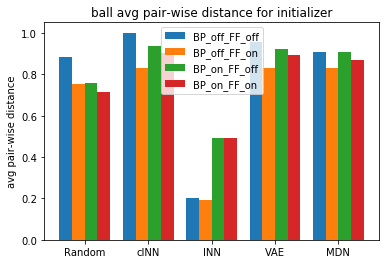

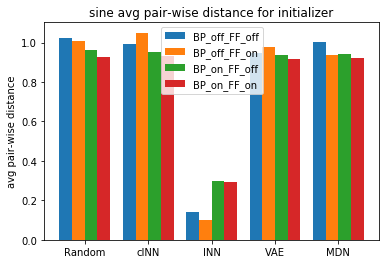

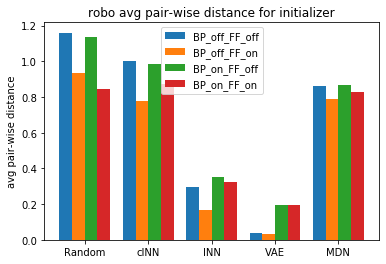

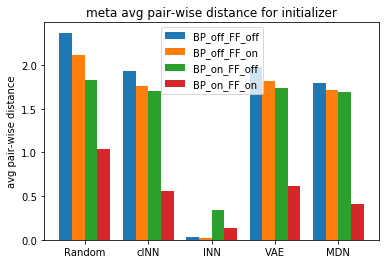

In [27]:



for ds in ds_list:
    print('dataset=', ds)
    BP_off_FF_off, BP_off_FF_on, BP_on_FF_off, BP_on_FF_on = [], [], [], []
    for method in method_list:
        for BP_FF in BP_FF_list:
            row_index = method + '_' + BP_FF
            eval(BP_FF).append(df[ds][row_index])
    
    print(BP_off_FF_off)
    # Drawing
    f = plt.figure()
    ax = plt.gca()
    X = np.arange(len(method_list))
    offset = 0
    for BP_FF in BP_FF_list:
        ax.bar(X + offset, eval(BP_FF), width=0.2, label=BP_FF)
        offset += 0.2
    plt.legend()
    plt.xticks(0.3+X, method_list)
    plt.ylabel('avg pair-wise distance')
    plt.title('{} avg pair-wise distance for initializer'.format(ds))
    plt.savefig('{}_avg_pw_distance.png'.format(ds))
